<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploration</a></span></li></ul></div>

# Introduction

This notebook explores the properties of the scoring function.

# Setup

In [1]:
%%capture
%cd ..

# Libraries

In [2]:
from src import preference_reranker as pr

In [3]:
import seaborn as sns; sns.set()

# Exploration

The scoring function:

In [4]:
help(pr.compute_movie_score)

Help on function compute_movie_score in module src.preference_reranker:

compute_movie_score(movie:src.custom_types.Movie, current_reclist:List[src.custom_types.Movie], longtail_pref:float, longtail_weight:float) -> float



Create a longtail movie:

In [5]:
m = pr.Movie(movie_id=123, base_score=0.7, category="longtail")

When current list, $S$ contains just shorthead items:

[Text(0, 0.5, 'new score'), Text(0.5, 0, '$|S|$')]

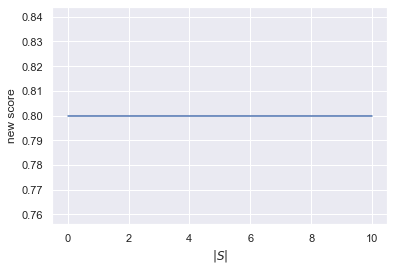

In [6]:
x = list(range(11))
y = []

for i in x:
    current_reclist = [pr.Movie(454, 0.9, category="shorthead") for _ in range(i)]
    y = pr.compute_movie_score(movie = m,
                               current_reclist=current_reclist,
                               longtail_pref=0.9,
                               longtail_weight=0.5)

ax = sns.lineplot(x=x, y=y)
ax.set(xlabel="$|S|$", ylabel="new score")

When current list, $S$, contains just longtail items:

[Text(0, 0.5, 'new score'), Text(0.5, 0, '$|S|$')]

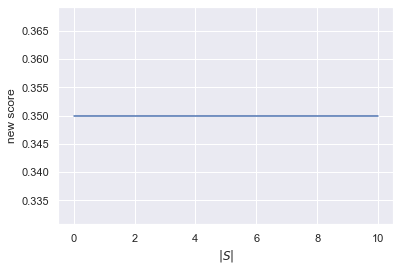

In [7]:
x = list(range(11))
y = []

for i in x:
    current_reclist = [pr.Movie(454, 0.9, category="longtail") for _ in range(i)]
    y = pr.compute_movie_score(movie = m,
                               current_reclist=current_reclist,
                               longtail_pref=0.9,
                               longtail_weight=0.5)

ax = sns.lineplot(x=x, y=y)
ax.set(xlabel="$|S|$", ylabel="new score")

[Text(0, 0.5, 'new score'), Text(0.5, 0, '$|S|$')]

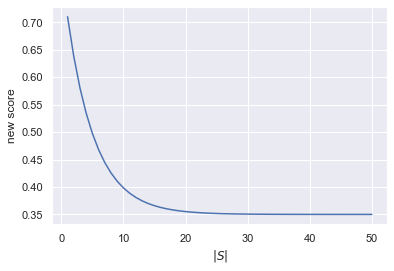

In [8]:
longtail_weight = 0.50
base_score = 0.70
category_ratio = 0.20
category_pref = 0.90

xs = list(range(1, 51))
ys = []

for x in xs:
    recsize = x
    
    weighted_base_score = (1 - longtail_weight) * base_score
    weighted_category_booster = (
        longtail_weight * category_pref * (1 - category_ratio) ** recsize
    )
    
    y = weighted_base_score + weighted_category_booster
    ys.append(y)

ax = sns.lineplot(x=xs, y=ys)
ax.set(xlabel="$|S|$", ylabel="new score")